# Analyse correlations between PlanetScope and Sentinel-2

Load and analyse correlation coefficients between PlanetScope and Sentinel-2 regarding the following variables:

* Planet satellite
* Land use
* Area

## Prepare libraries and plotting environment

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot inline
%matplotlib inline
# Define figure size
plt.rcParams['figure.figsize'] = (10, 8)

## Load data

In [3]:
# Correlations files
coor_fn_list = {
    1: "./data/Izola_coeff.csv",
    2: "./data/Jesenice_coeff.csv",
    3: "./data/Kranj_coeff.csv",
    4: "./data/Radenci_coeff.csv",
}

# Aggregated filename
corr_df_fn = "./data/corr_df.csv"

In [4]:
# Load all files
li = []
for area in coor_fn_list.keys():
    df = pd.read_csv(
        coor_fn_list[area],
        index_col=0,
        dtype={"band": "int"},
        parse_dates=["PS_Date", "S2_Date"],
    )
    df["Area"] = area
    li.append(df)
corr_df = pd.concat(li, axis=0, ignore_index=True)

In [5]:
corr_df.head()

,PS_filename,PS_Date,S2_filename,S2_Date,band,perc_valid,m,b,Area
0,I5_20170124_0e30_analytic_mosaic.tif,2017-01-24,20170124T101311_S2A_MSIL2A_20170124T101407_W02...,2017-01-24,0,0.494453,0.000062,-0.108939,1
1,I5_20170124_0e30_analytic_mosaic.tif,2017-01-24,20170124T101311_S2A_MSIL2A_20170124T101407_W02...,2017-01-24,1,0.494453,0.000072,-0.102311,1
2,I5_20170124_0e30_analytic_mosaic.tif,2017-01-24,20170124T101311_S2A_MSIL2A_20170124T101407_W02...,2017-01-24,2,0.494453,0.000072,-0.063634,1
3,I5_20170124_0e30_analytic_mosaic.tif,2017-01-24,20170124T101311_S2A_MSIL2A_20170124T101407_W02...,2017-01-24,3,0.494453,0.000091,-0.010202,1
4,I5_20170313_0e14_analytic_mosaic.tif,2017-03-13,20170312T100021_S2A_MSIL2A_20170312T100706_C12...,2017-03-12,0,0.807692,0.000036,-0.066416,1


In [6]:
corr_df.dtypes

PS_filename            object
PS_Date        datetime64[ns]
S2_filename            object
S2_Date        datetime64[ns]
band                    int32
perc_valid            float64
m                     float64
b                     float64
Area                    int64
dtype: object

In [7]:
# Split PS_filename at _ and create new column PS_Sat from the second part
corr_df["PS_Sat"] = corr_df["PS_filename"].str.split("_").str[2]
corr_df["PS_Sat"] = corr_df["PS_Sat"].astype("category")

In [8]:
# Split S2_filename at _ and create new column S2_Sat from the second part
corr_df["S2_Sat"] = corr_df["S2_filename"].str.split("_").str[1]
corr_df["S2_Sat"] = corr_df["S2_Sat"].astype("category")

In [9]:
corr_df.head()

,PS_filename,PS_Date,S2_filename,S2_Date,band,perc_valid,m,b,Area,PS_Sat,S2_Sat
0,I5_20170124_0e30_analytic_mosaic.tif,2017-01-24,20170124T101311_S2A_MSIL2A_20170124T101407_W02...,2017-01-24,0,0.494453,0.000062,-0.108939,1,0e30,S2A
1,I5_20170124_0e30_analytic_mosaic.tif,2017-01-24,20170124T101311_S2A_MSIL2A_20170124T101407_W02...,2017-01-24,1,0.494453,0.000072,-0.102311,1,0e30,S2A
2,I5_20170124_0e30_analytic_mosaic.tif,2017-01-24,20170124T101311_S2A_MSIL2A_20170124T101407_W02...,2017-01-24,2,0.494453,0.000072,-0.063634,1,0e30,S2A
3,I5_20170124_0e30_analytic_mosaic.tif,2017-01-24,20170124T101311_S2A_MSIL2A_20170124T101407_W02...,2017-01-24,3,0.494453,0.000091,-0.010202,1,0e30,S2A
4,I5_20170313_0e14_analytic_mosaic.tif,2017-03-13,20170312T100021_S2A_MSIL2A_20170312T100706_C12...,2017-03-12,0,0.807692,0.000036,-0.066416,1,0e14,S2A


In [10]:
# Save dataframe
corr_df.to_csv(corr_df_fn)

### Analyse number of PS and S2 images

Analyse number of PS and S2 images, and satellites used for the analysis.

In [11]:
# print length of dataframe
print(f'In total {len(corr_df)} image pairs are used.')

In total 10688 image pairs are used.


In [12]:
# Count unique number of PS_Sat
print(f'Number of unique PS satellites: {len(corr_df["PS_Sat"].unique())}')

Number of unique PS satellites: 165


In [13]:
# Count unique number of S2_Sat
print(f'Number of unique S2 satellites: {len(corr_df["S2_Sat"].unique())}')

Number of unique S2 satellites: 2


In [14]:
# Group by PS_Sat
ps_sat_count = corr_df.groupby("PS_Sat").count()['m']

In [15]:
# Sort
ps_sat_count = ps_sat_count.sort_values(ascending=False)

In [16]:
ps_sat_count.head()

PS_Sat
100a    208
1040    200
1032    200
103c    192
1035    192
Name: m, dtype: int64

<AxesSubplot:xlabel='PS_Sat'>

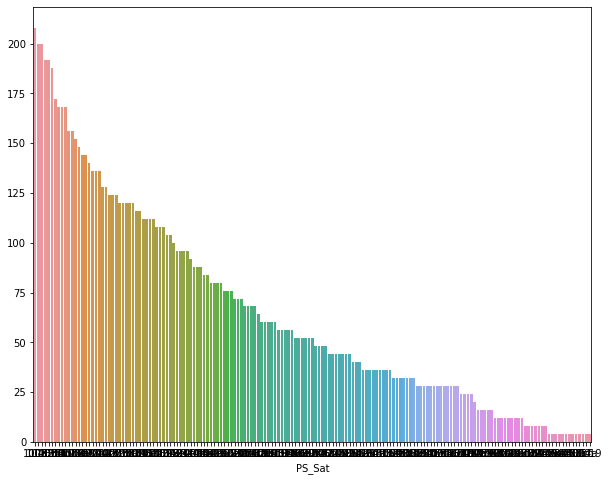

In [17]:
# Seaborn barplot, order by m
sns.barplot(x=ps_sat_count.index, y=ps_sat_count.values, order=ps_sat_count.index)

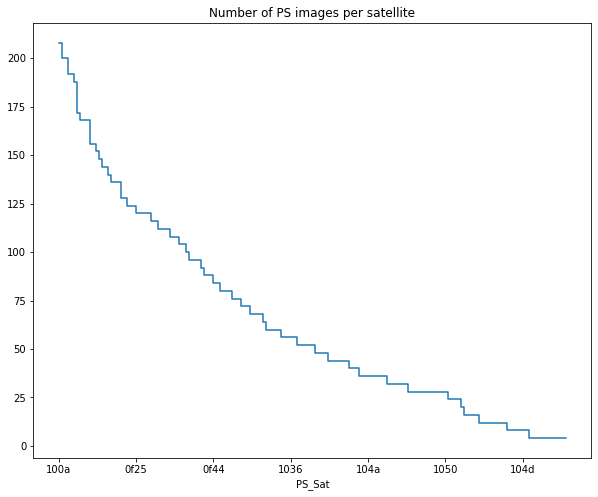

In [18]:
# Plot number of PS images per satellite
ps_sat_count.plot(drawstyle="steps-post")
plt.title("Number of PS images per satellite")
plt.show()

<AxesSubplot:xlabel='S2_Sat', ylabel='Count'>

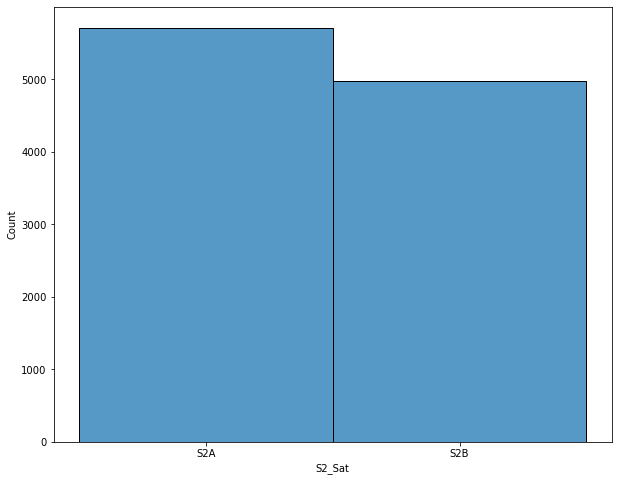

In [19]:
# PLot histogram of S2_Sat
sns.histplot(corr_df["S2_Sat"])

## Correlation analysis

Use only selected columns for analysis.

In [20]:
# Use only Area, PS_Date, band, PS_sat, and m
corr_sub_df = corr_df[["Area", "PS_Date", "band", "PS_Sat", "m"]]

In [21]:
corr_sub_df.head()

,Area,PS_Date,band,PS_Sat,m
0,1,2017-01-24,0,0e30,0.000062
1,1,2017-01-24,1,0e30,0.000072
2,1,2017-01-24,2,0e30,0.000072
3,1,2017-01-24,3,0e30,0.000091
4,1,2017-03-13,0,0e14,0.000036


### Plot correlation coefficients by time and band

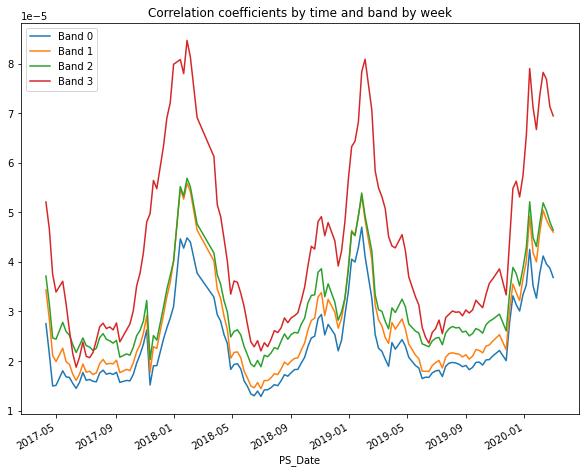

In [22]:
# Iterate over all bands
for band in corr_sub_df["band"].unique():
    # Select only band
    band_df = corr_sub_df[corr_sub_df["band"] == band]
    # Aggregate by week
    band_df_agg = band_df.groupby([pd.Grouper(key="PS_Date", freq="W")]).mean()
    band_df_agg['m'].dropna().rolling(window=7).mean().plot(label=f"Band {band}")
plt.legend()
plt.title("Correlation coefficients by time and band by week")
plt.show()

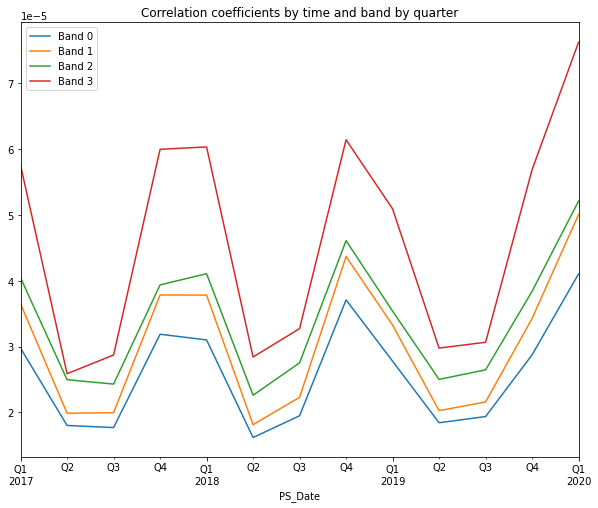

In [23]:
# Iterate over all bands
for band in corr_sub_df["band"].unique():
    # Select only band
    band_df = corr_sub_df[corr_sub_df["band"] == band]
    # Aggregate by week
    band_df_agg = band_df.groupby([pd.Grouper(key="PS_Date", freq="Q")]).mean()
    band_df_agg['m'].plot(label=f"Band {band}")
plt.legend()
plt.title("Correlation coefficients by time and band by quarter")
plt.show()

### Plot correlation coefficients by area, time and band

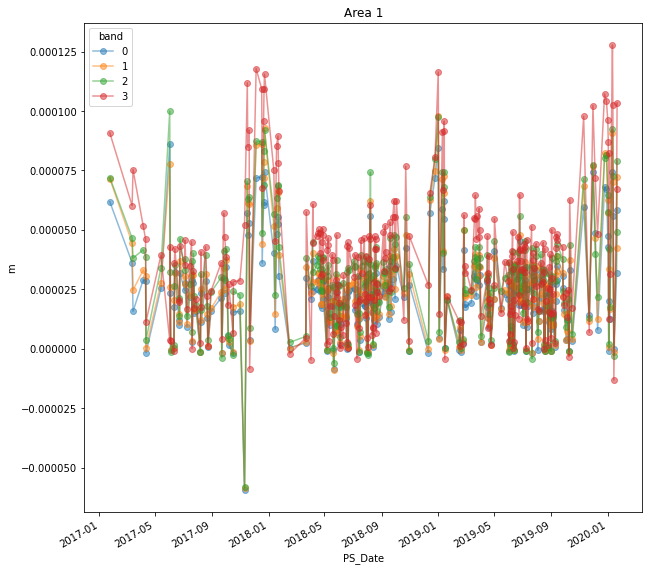

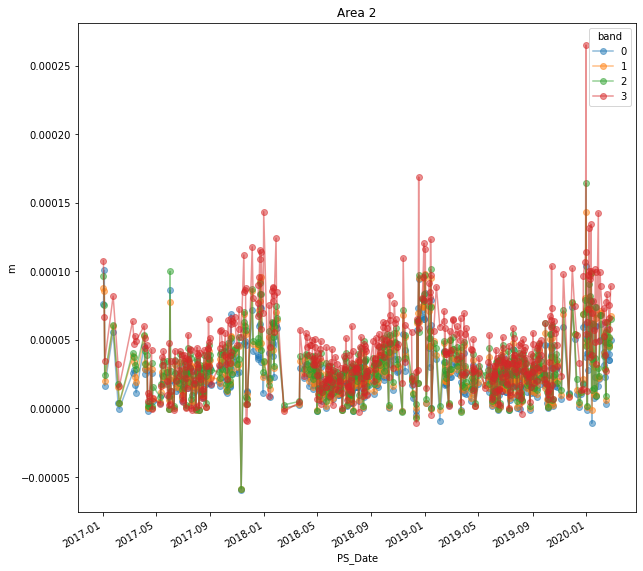

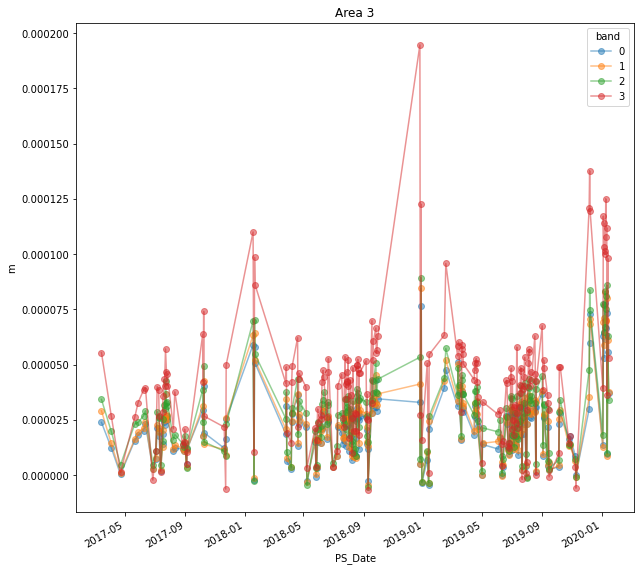

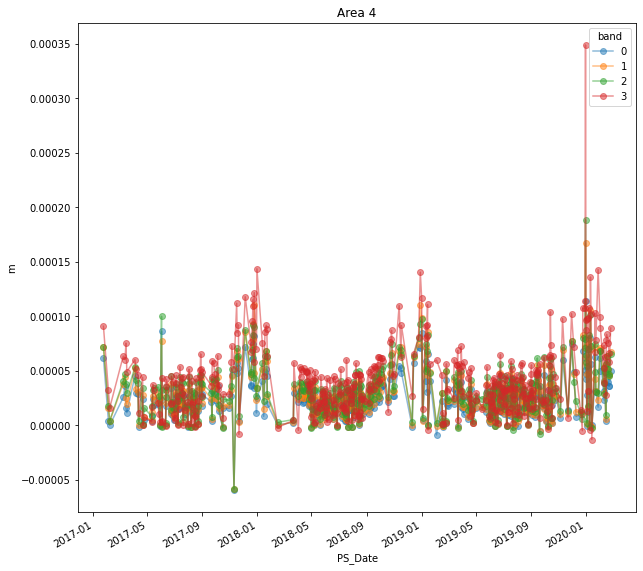

In [24]:
# Plot PS_Date vs m, for each area and band
for area in np.unique(corr_sub_df["Area"]):
    # Get df for area, drop area column
    area_df = corr_sub_df.loc[corr_sub_df["Area"] == area, :].drop(
        columns=["Area"]
    )
    # Convert to wide
    df = pd.pivot_table(area_df,index=['PS_Date'], columns = 'band', values = "m")
    # Plot
    fig, ax = plt.subplots(figsize=(10, 10))
    df.plot(ax=ax, alpha=0.5, marker='o')
    ax.set_title(f"Area {area}")
    ax.set_xlabel("PS_Date")
    ax.set_ylabel("m")

### Smooth data

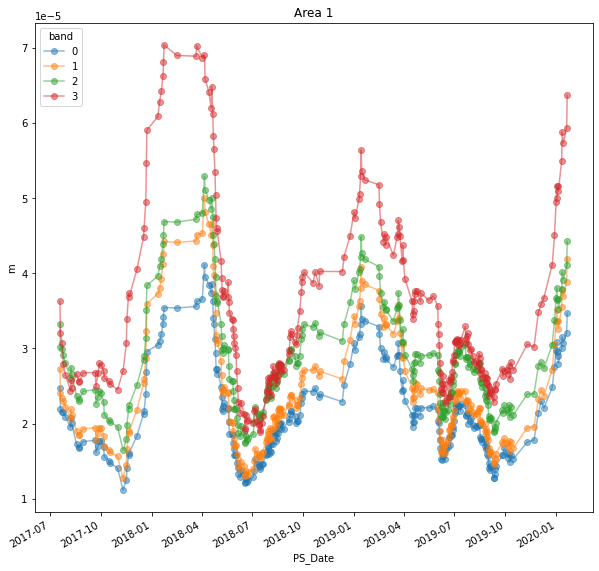

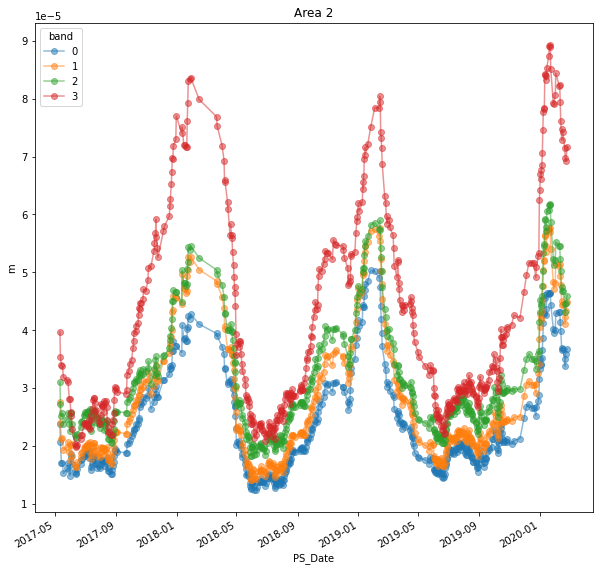

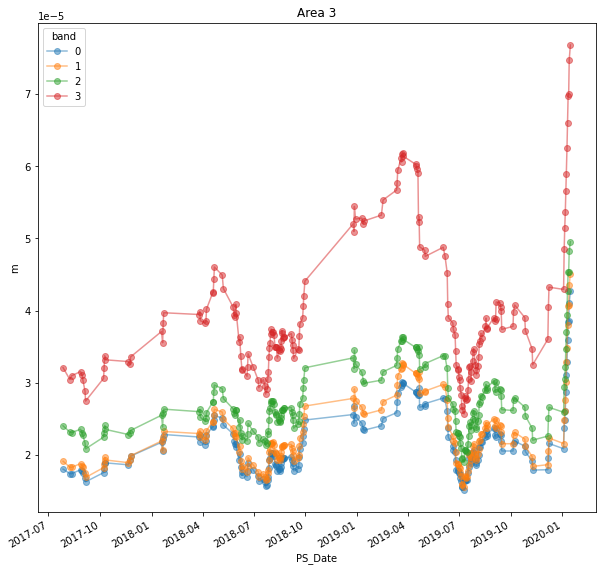

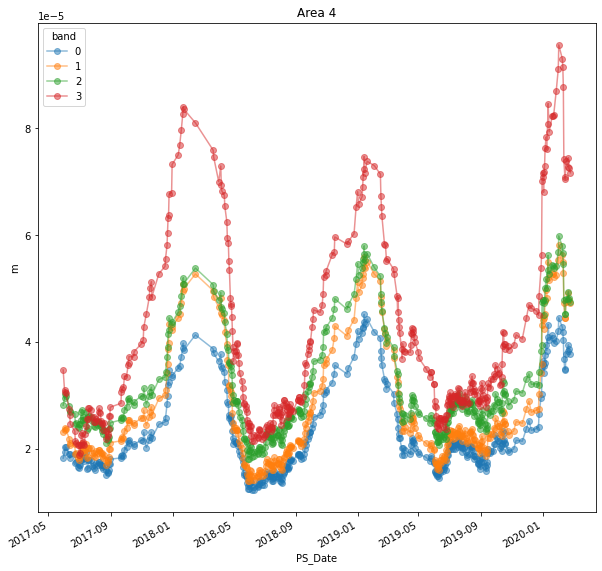

In [25]:
# Plot PS_Date vs m, for each area and band
for area in np.unique(corr_sub_df["Area"]):
    # Get df for area, drop area column
    area_df = corr_sub_df.loc[corr_sub_df["Area"] == area, :].drop(
        columns=["Area"]
    )
    # Convert to wide
    df = pd.pivot_table(area_df,index=['PS_Date'], columns = 'band', values = "m")
    # Smooth df by rolling mean
    df_smooth = df.rolling(window=21).mean()
    # Plot
    fig, ax = plt.subplots(figsize=(10, 10))
    df_smooth.plot(ax=ax, alpha=0.5, marker='o')
    ax.set_title(f"Area {area}")
    ax.set_xlabel("PS_Date")
    ax.set_ylabel("m")

### Mean m by band

In [26]:
corr_sub_df.head()

,Area,PS_Date,band,PS_Sat,m
0,1,2017-01-24,0,0e30,0.000062
1,1,2017-01-24,1,0e30,0.000072
2,1,2017-01-24,2,0e30,0.000072
3,1,2017-01-24,3,0e30,0.000091
4,1,2017-03-13,0,0e14,0.000036


In [27]:
# Compute mean m by band, ignore Area
mean_m_by_band = corr_sub_df.groupby("band").mean()

In [28]:
# Drop Area column
mean_m_by_band = mean_m_by_band.drop(columns=["Area"])

In [29]:
mean_m_by_band.head()

,m
band,
0,0.000023
1,0.000026
2,0.000030
3,0.000039


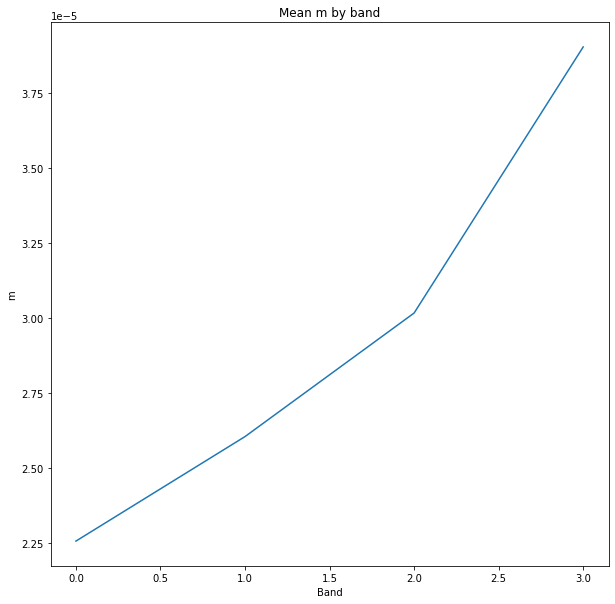

In [55]:
# Plot mean m by band
fig, ax = plt.subplots(figsize=(10, 10))
mean_m_by_band.plot(ax=ax)
ax.set_title("Mean m by band")
ax.set_xlabel("Band")
ax.set_ylabel("m")
# No legend
ax.legend().set_visible(False)
plt.show()

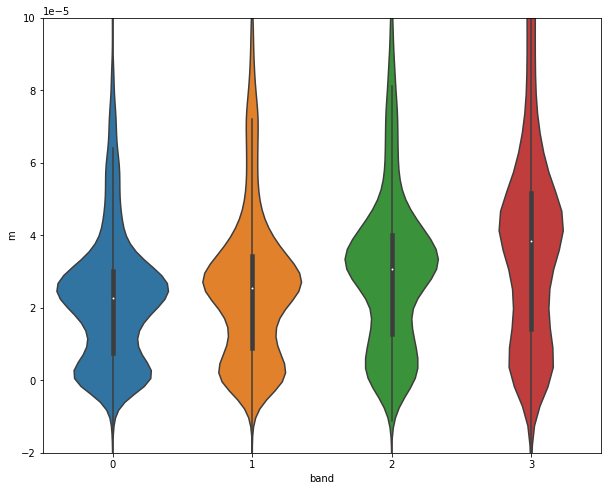

In [50]:
# Create violin plot
sns.violinplot(data=corr_sub_df, x="band", y="m")
plt.ylim(-0.00002, 0.0001)
plt.show()

### Statistics of m by area and band

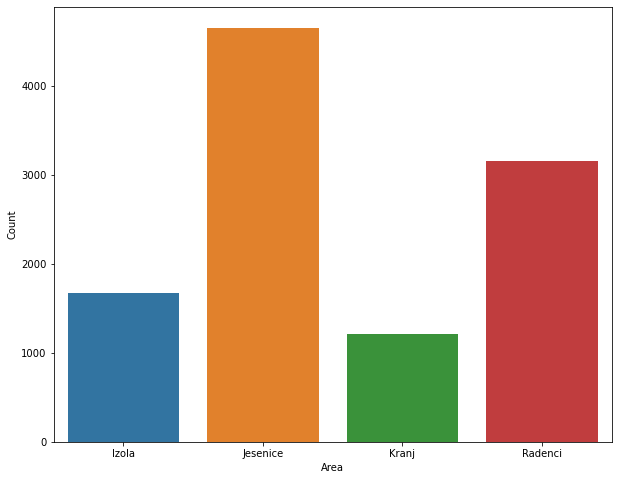

In [32]:
# Histogram of Area
fig, ax = plt.subplots()
ax = sns.countplot(data=corr_sub_df, x="Area")
ax.set_xlabel("Area")
ax.set_ylabel("Count")
plt.xticks([0, 1, 2, 3], ["Izola", "Jesenice", "Kranj", "Radenci"])
plt.show()

In [33]:
corr_sub_df.head()

,Area,PS_Date,band,PS_Sat,m
0,1,2017-01-24,0,0e30,0.000062
1,1,2017-01-24,1,0e30,0.000072
2,1,2017-01-24,2,0e30,0.000072
3,1,2017-01-24,3,0e30,0.000091
4,1,2017-03-13,0,0e14,0.000036


In [34]:
# Compute mean m by area and band
mean_m_by_area_band = corr_sub_df.groupby(["band", "Area"]).mean()

In [35]:
mean_m_by_area_band.head()

m
band Area          
0    1     0.000021
     2     0.000023
     3     0.000023
     4     0.000022
1    1     0.000024

In [36]:
# To wide
mean_m_by_area_band_wide = mean_m_by_area_band.unstack()

In [37]:
mean_m_by_area_band_wide.head()

m                              
Area         1         2         3         4
band                                        
0     0.000021  0.000023  0.000023  0.000022
1     0.000024  0.000027  0.000024  0.000026
2     0.000029  0.000031  0.000028  0.000030
3     0.000035  0.000040  0.000041  0.000039

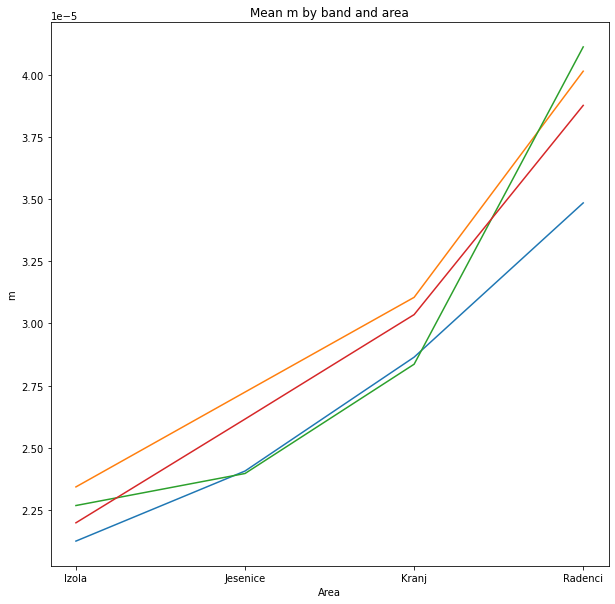

In [38]:
# Plot mean m by band
fig, ax = plt.subplots(figsize=(10, 10))
mean_m_by_area_band_wide.plot(ax=ax)
ax.set_title("Mean m by band and area")
ax.set_xlabel("Area")
ax.set_ylabel("m")
plt.xticks([0, 1, 2, 3], ["Izola", "Jesenice", "Kranj", "Radenci"])
# No legend
ax.legend().set_visible(False)

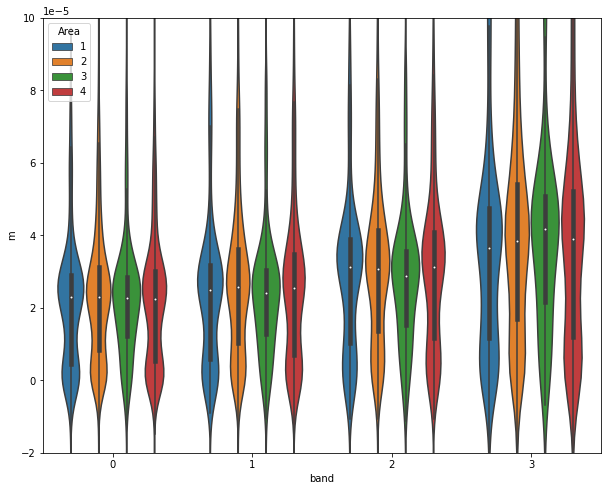

In [49]:
# Create violin plot
sns.violinplot(data=corr_sub_df, x="band", y="m", hue="Area")
plt.ylim(-0.00002, 0.0001)
plt.show()